In [1]:
import pandas as pd

## 0. Import and manipulate data

### 0.1 Import the google sheet with the information for the clients

In [4]:
# Import the google sheet with the information for the clients
sheet_name = 'notification_system'
sheet_id = '1pBc41Rl1NaijOuGKuX0AiAj2eYi6ubO_FDpMMFyhwpU'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data = pd.read_csv(url)
data

,Client Name,Type of Bill,Amount,Expiration Date,Client Email,Notification Sent
0,Client 1,Electricity,"120,5",20/02/2025,client1@email.com,Not Sent
1,Client 2,Telephony,45,18/02/2025,client2@email.com,Not Sent
2,Client 3,Water,"80,75",25/02/2025,client3@email.com,Not Sent
3,Client 1,Internet,60,22/02/2025,client1@email.com,Not Sent
4,Client 4,Gas,"95,25",15/02/2025,client4@email.com,Not Sent
5,Client 5,Electricity,110,28/02/2025,client5@email.com,Not Sent
6,Client 6,Water,"77,4",19/02/2025,client6@email.com,Not Sent
7,Client 7,Telephony,"40,25",21/02/2025,client7@email.com,Not Sent
8,Client 2,Gas,88,23/02/2025,client2@email.com,Not Sent
9,Client 8,Internet,55,27/02/2025,client8@email.com,Not Sent


### 0.2 Check data types and change them where necessary

In [6]:
data.dtypes

Client Name          object
Type of Bill         object
Amount               object
Expiration Date      object
Client Email         object
Notification Sent    object
dtype: object

In [7]:
data['Amount'] = data['Amount'].str.replace(',', '.')
data['Amount'] = data['Amount'].astype(float)

In [8]:
data['Expiration Date'] = pd.to_datetime(data['Expiration Date'], format="%d/%m/%Y")
data

,Client Name,Type of Bill,Amount,Expiration Date,Client Email,Notification Sent
0,Client 1,Electricity,120.50,2025-02-20,client1@email.com,Not Sent
1,Client 2,Telephony,45.00,2025-02-18,client2@email.com,Not Sent
2,Client 3,Water,80.75,2025-02-25,client3@email.com,Not Sent
3,Client 1,Internet,60.00,2025-02-22,client1@email.com,Not Sent
4,Client 4,Gas,95.25,2025-02-15,client4@email.com,Not Sent
5,Client 5,Electricity,110.00,2025-02-28,client5@email.com,Not Sent
6,Client 6,Water,77.40,2025-02-19,client6@email.com,Not Sent
7,Client 7,Telephony,40.25,2025-02-21,client7@email.com,Not Sent
8,Client 2,Gas,88.00,2025-02-23,client2@email.com,Not Sent
9,Client 8,Internet,55.00,2025-02-27,client8@email.com,Not Sent


In [9]:
data.dtypes

Client Name                  object
Type of Bill                 object
Amount                      float64
Expiration Date      datetime64[ns]
Client Email                 object
Notification Sent            object
dtype: object

## 1. Find the discrete clients and the bill categories

### 1.1 Find the discrete clients

In [12]:
discrete_clients = data[['Client Name']].drop_duplicates().reset_index(drop=True)
discrete_clients

,Client Name
0,Client 1
1,Client 2
2,Client 3
3,Client 4
4,Client 5
5,Client 6
6,Client 7
7,Client 8
8,Client 9
9,Client 10


### 1.2 Find the bill categories

In [14]:
bill_categories = data[['Type of Bill']].drop_duplicates().reset_index(drop=True)
bill_categories

,Type of Bill
0,Electricity
1,Telephony
2,Water
3,Internet
4,Gas


### 1.3 Plot the amount of different kind of bills

In [16]:
amount_of_bills = data['Type of Bill'].value_counts()
amount_of_bills

Type of Bill
Electricity    4
Telephony      4
Water          4
Internet       3
Gas            3
Name: count, dtype: int64

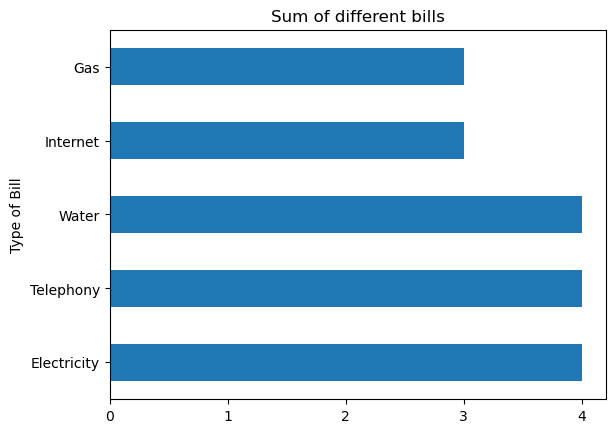

In [17]:
amount_of_bills.plot(kind='barh',title='Sum of different bills',xticks=range(0,5));

### 1.4 Plot the amount of bills that belong to each client

In [19]:
bills_per_client = data.value_counts('Client Name')
bills_per_client

Client Name
Client 1     3
Client 2     2
Client 3     2
Client 4     2
Client 5     2
Client 6     2
Client 9     2
Client 10    1
Client 7     1
Client 8     1
Name: count, dtype: int64

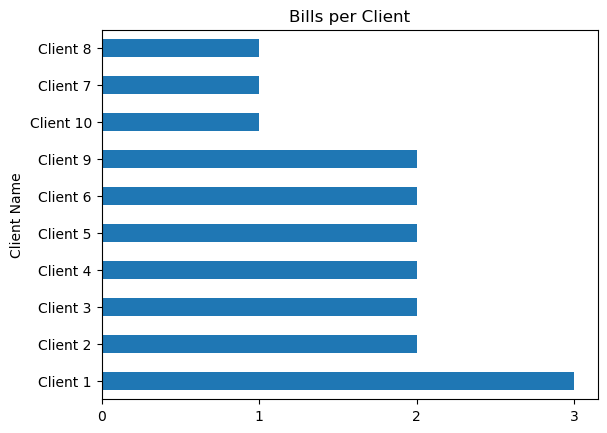

In [20]:
bills_per_client.plot(kind='barh',title='Bills per Client', xticks=range(0,4));

## 2. Find which bills are close to the expiration day

In [22]:
from datetime import datetime

# Add the date of your preference or leave the date variable 
# in the None state, so that the result will be computed based 
# on the current date.

date = "20/02/2025"

if date != None:
    date = pd.to_datetime(date, format="%d/%m/%Y")
else:
    date = datetime.now()

bills_to_be_expired = []

for id in data.index:
    remaining_days = (data['Expiration Date'][id] - date)
    if data['Notification Sent'][id] == 'Not Sent':
        row = data.loc[id].copy()
        row['Remaining Days'] = remaining_days.days
        bills_to_be_expired.append(row)

bills_to_be_expired = pd.DataFrame(bills_to_be_expired)

#### Tabe with all the information of bills that are close to expiration day

In [24]:
bills_to_be_expired

,Client Name,Type of Bill,Amount,Expiration Date,Client Email,Notification Sent,Remaining Days
0,Client 1,Electricity,120.50,2025-02-20,client1@email.com,Not Sent,0
1,Client 2,Telephony,45.00,2025-02-18,client2@email.com,Not Sent,-2
2,Client 3,Water,80.75,2025-02-25,client3@email.com,Not Sent,5
3,Client 1,Internet,60.00,2025-02-22,client1@email.com,Not Sent,2
4,Client 4,Gas,95.25,2025-02-15,client4@email.com,Not Sent,-5
5,Client 5,Electricity,110.00,2025-02-28,client5@email.com,Not Sent,8
6,Client 6,Water,77.40,2025-02-19,client6@email.com,Not Sent,-1
7,Client 7,Telephony,40.25,2025-02-21,client7@email.com,Not Sent,1
8,Client 2,Gas,88.00,2025-02-23,client2@email.com,Not Sent,3
9,Client 8,Internet,55.00,2025-02-27,client8@email.com,Not Sent,7


## 3. Prepare emails for those clients that their bills are going to expire and also inform them about the rest of their bills


### 3.1 Create a dictionary that contains the clients with bills close to the expiration day

In [27]:
expiring_bills = {}
for id in bills_to_be_expired.index:
    if 0 <= bills_to_be_expired['Remaining Days'][id] <= 3:
        if bills_to_be_expired['Client Name'][id] not in expiring_bills:
            expiring_bills[bills_to_be_expired['Client Name'][id]] = []
        expiring_bills[bills_to_be_expired['Client Name'][id]].append(bills_to_be_expired['Type of Bill'][id])
expiring_bills

{'Client 1': ['Electricity', 'Internet'],
 'Client 7': ['Telephony'],
 'Client 2': ['Gas']}

### 3.2 Create a dictionary with the information for the rest of the bills, of the clients who have expiring bills

In [29]:
not_expiring_bills = {}
for id in bills_to_be_expired.index:
    if bills_to_be_expired['Client Name'][id] in expiring_bills:
        name = bills_to_be_expired['Client Name'][id]
        if bills_to_be_expired['Type of Bill'][id] not in expiring_bills[name]:
            if bills_to_be_expired['Client Name'][id] not in not_expiring_bills:
                not_expiring_bills[bills_to_be_expired['Client Name'][id]] = []
            not_expiring_bills[name].append(bills_to_be_expired['Type of Bill'][id])

not_expiring_bills

{'Client 2': ['Telephony']}

### 3.3 Send emails to the clients to inform them about their bills

In [31]:
emails = {}
for name, bills in expiring_bills.items():
    if len(bills) == 1:
        emails[name] = f"Mr./Ms. {name} your bill is about to expire. The bill is for {bills[0]}"
    elif len(bills) > 1:
        emails[name] = f"Mr./Ms. {name} your bills are about to expire. The bills are for {bills[0]}"
        for id in range(1, len(bills)):
            emails[name] += f", {bills[id]}"


emails

{'Client 1': 'Mr./Ms. Client 1 your bills are about to expire. The bills are for Electricity, Internet',
 'Client 7': 'Mr./Ms. Client 7 your bill is about to expire. The bill is for Telephony',
 'Client 2': 'Mr./Ms. Client 2 your bill is about to expire. The bill is for Gas'}

In [32]:
for name, bills in not_expiring_bills.items():
    if name in not_expiring_bills:
        if len(bills) == 1:
            emails[name] += f". The other bill is not close to expiration, which is about {bills[0]}"
        elif len(bills) > 1:
            emails[name] += f". The other bills are not close to expiration, which are about {bills[0]}"
            for id in range(1, len(bills)):
                emails[name] += f", {not_expiring_bills[id]}"

emails

{'Client 1': 'Mr./Ms. Client 1 your bills are about to expire. The bills are for Electricity, Internet',
 'Client 7': 'Mr./Ms. Client 7 your bill is about to expire. The bill is for Telephony',
 'Client 2': 'Mr./Ms. Client 2 your bill is about to expire. The bill is for Gas. The other bill is not close to expiration, which is about Telephony'}

## 4. Change the status of 'Notification Sent' column to the clients that a notification has been sent

In [34]:
for id in data.index:
    if data['Client Name'][id] in expiring_bills:
        for bill in expiring_bills[data['Client Name'][id]]:
            if bill == data['Type of Bill'][id]:
                data.loc[id, 'Notification Sent'] = 'Sent'


## The Final Table

In [58]:
data

,Client Name,Type of Bill,Amount,Expiration Date,Client Email,Notification Sent
0,Client 1,Electricity,120.50,2025-02-20,client1@email.com,Sent
1,Client 2,Telephony,45.00,2025-02-18,client2@email.com,Not Sent
2,Client 3,Water,80.75,2025-02-25,client3@email.com,Not Sent
3,Client 1,Internet,60.00,2025-02-22,client1@email.com,Sent
4,Client 4,Gas,95.25,2025-02-15,client4@email.com,Not Sent
5,Client 5,Electricity,110.00,2025-02-28,client5@email.com,Not Sent
6,Client 6,Water,77.40,2025-02-19,client6@email.com,Not Sent
7,Client 7,Telephony,40.25,2025-02-21,client7@email.com,Sent
8,Client 2,Gas,88.00,2025-02-23,client2@email.com,Sent
9,Client 8,Internet,55.00,2025-02-27,client8@email.com,Not Sent
